# Text exploration

1. Read document

English

In [1]:
import nltk
nltk.download('gutenberg')
nltk.download('maxent_treebank_pos_tagger')

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/pistispark/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /Users/pistispark/nltk_data...
[nltk_data]   Unzipping taggers/maxent_treebank_pos_tagger.zip.


True

In [2]:
from nltk.corpus import gutenberg   # Docs from project gutenberg.org
files_en = gutenberg.fileids()      # Get file ids
doc_en = gutenberg.open('austen-emma.txt').read()

Korean

In [3]:
from konlpy.corpus import kobill    # Docs from pokr.kr/bill
files_ko = kobill.fileids()         # Get file ids
doc_ko = kobill.open('1809890.txt').read()

2. Tokenize

There are numerous ways to tokenize a document.

Here, we use nltk.regexp_tokenize for English, konlpy.tag.Twitter.morph for Korean text.

English

In [4]:
from nltk import regexp_tokenize
pattern = r'''(?x) ([A-Z]\.)+ | \w+(-\w+)* | \$?\d+(\.\d+)?%? | \.\.\. | [][.,;"'?():-_`]'''
tokens_en = regexp_tokenize(doc_en, pattern)

Korean

In [5]:
from konlpy.tag import Twitter; t = Twitter()
tokens_ko = t.morphs(doc_ko)

/Users/pistispark/opt/anaconda3/lib/python3.7/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')
/Users/pistispark/opt/anaconda3/lib/python3.7/site-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


3. Load tokens with nltk.Text()

English

In [6]:
import nltk
en = nltk.Text(tokens_en)

Korean

In [7]:
import nltk
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890호')   # For Python 2, input `name` as u'유니코드'

4. Tokens

English

In [8]:
print(len(en.tokens))       # returns number of tokens (document length)
print(len(set(en.tokens)))  # returns number of unique tokens
en.vocab()                  # returns frequency distribution

191061
232


FreqDist({('', '', ''): 190496, ('', '-room', ''): 34, ('', '-day', ''): 31, ('', '-morrow', ''): 27, ('', '-twenty', ''): 16, ('', '-will', ''): 14, ('', '-hearted', ''): 12, ('', '-law', ''): 12, ('E.', '', ''): 11, ('', '-tempered', ''): 9, ...})

Korean

In [9]:
print(len(ko.tokens))       # returns number of tokens (document length)
print(len(set(ko.tokens)))  # returns number of unique tokens
ko.vocab()                  # returns frequency distribution

1777
476


FreqDist({'\n\n': 127, '.': 49, '의': 46, '육아휴직': 38, '을': 28, '(': 27, ')': 26, '이': 25, '자': 24, '에': 23, ...})

5. Plot frequency distributions

English

In [10]:
%matplotlib inline 

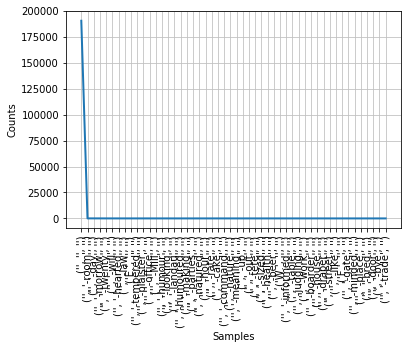

In [11]:
en.plot(50)     # Plot sorted frequency of top 50 tokens

Korean

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 8228 missing from current font.
  font.load_char(ord(s), flags=flags)


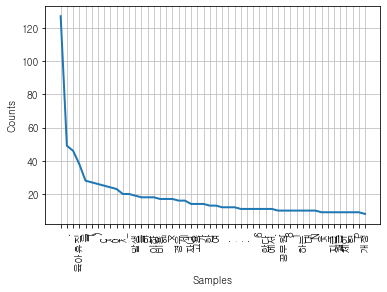

In [21]:
ko.plot(50)     # Plot sorted frequency of top 50 tokens

Tip: To save a plot programmably, and not through the GUI, overwrite pylab.show with pylab.savefig before drawing the plot (reference):

In [12]:
from matplotlib import pylab
pylab.show = lambda: pylab.savefig('some_filename.png')

Troubleshooting: For those who see rectangles instead of letters in the saved plot file, include the following configurations before drawing the plot:

In [13]:
from matplotlib import font_manager, rc
font_fname = 'c:/windows/fonts/gulim.ttc'     # A font of your choice
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

FileNotFoundError: [Errno 2] No such file or directory: 'c:/windows/fonts/gulim.ttc'

6. Count

English

In [19]:
en.count('Emma')        # Counts occurrences

0

Korean

In [20]:
ko.count('초등학교')   # Counts occurrences

6

7. Dispersion plot

English

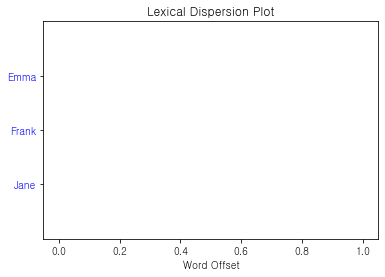

In [22]:
en.dispersion_plot(['Emma', 'Frank', 'Jane'])

Korean

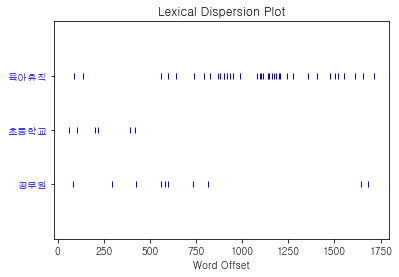

In [23]:
ko.dispersion_plot(['육아휴직', '초등학교', '공무원'])

# Tagging and chunking

1. POS tagging

English

In [14]:
tokens = "The little yellow dog barked at the Persian cat".split()
tags_en = nltk.pos_tag(tokens)

LookupError: 
**********************************************************************
  Resource [93maveraged_perceptron_tagger[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('averaged_perceptron_tagger')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtaggers/averaged_perceptron_tagger/averaged_perceptron_tagger.pickle[0m

  Searched in:
    - '/Users/pistispark/nltk_data'
    - '/Users/pistispark/opt/anaconda3/nltk_data'
    - '/Users/pistispark/opt/anaconda3/share/nltk_data'
    - '/Users/pistispark/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


Korean

In [40]:
from konlpy.tag import Twitter; t = Twitter()
tags_ko = t.pos("작고 노란 강아지가 페르시안 고양이에게 짖었다")

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


2. Noun phrase chunking

English

In [15]:
parser_en = nltk.RegexpParser("NP: {<DT>?<JJ>?<NN.*>*}")
chunks_en = parser_en.parse(tags_en)
chunks_en.draw()

NameError: name 'tags_en' is not defined

Korean

In [42]:
parser_ko = nltk.RegexpParser("NP: {<Adjective>*<Noun>*}")
chunks_ko = parser_ko.parse(tags_ko)
chunks_ko.draw()